# Project - Bank Churn Prediction : `Neural Network`

## Description

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

- Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
- Enable bank to take proactve measures to restrict customer churn and improve customer retention.
- To come up with area of core issues to address for the customer retention and areas of improvement.

## Data Dictionary 
The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

1. **CustomerId**: Unique ID which is assigned to each customer
2. **Surname**: Last name of the customer 
3. **CreditScore**: It defines the credit history of the customer.  
4. **Geography**: A customer’s location    
5. **Gender**: It defines the Gender of the customer   
6. **Age**: Age of the customer     
7. **Tenure**: Number of years for which the customer has been with the bank
8. **NumOfProducts**: It refers to the number of products that a customer has purchased through the bank.
9. **Balance**: Account balance
10. **HasCrCard**: It is a categorical variable that decides whether the customer has a credit card or not.
11. **EstimatedSalary**: Estimated salary 
12. **isActiveMember**: It is a categorical variable that decides whether the customer is an active member of the bank or not (Active member in the sense, using bank products regularly, making transactions, etc )
- **Excited**: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

## Index

- <a href = #link1>Overview of the dataset and Feature Elimintation</a>

- <a href = #link2>Exploratory Data Analysis</a>


- <a href = #link3>Insights based on EDA</a> 


- <a href = #link4>Data pre-processing</a>


- <a href = #link5>Model building</a> 


- <a href = #link6>Model Performance Improvement</a>


- <a href = #link7>Model Performance Evaluation</a>

- <a href = #link8>Conclusion and key takeaways</a>

- <a href = #link9>Actionable Insights & Recommendations</a>

## <a id = "link1"></a> Overview of the dataset

**Importing necessary libraries**

In [89]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

##splitting dataset to training and test set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import class_weight


##model libraries
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

#shapely for feature importance - 
import shap

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [90]:
df = pd.read_csv('bank.csv')

In [91]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

### View the first and last 5 rows of the dataset.

In [92]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [93]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


### Understand the shape of the dataset.

In [94]:
data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are no null values in the data.
* Surname, Geography and Gender are of the data type `object`. Rest all features are numerical type.

### Summary of the dataset.

In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


#### Observations:
* RowNumber is serial number here in the dataset  and can be elimintaed for further analysis and model building.
* CustomerId -  is specific id of the customers and doesn't seem to have any value addition for further decision making.
* CreditScore for the customers here lie from 350 to 850 with seeminglig having normal distribution.
* Age of the customers are widely distributed from 18 years to 92 years, with half of the customers having age less than 37 years.
*  Tenure of the customers are maximum upto 10 years.
* More than 25% customers are having zero balance.
* NumofProducts are ranging from 1 to 4 for the customers, of which half of them are having 1 product.
* 70% of the customers are having credit card.
* Around 51% of the customers are active members.
* Estimated salary for the customers are widly distributed from 11.5 to 199992, with average of 100K.
* Around 20% of the customers have left the bank and services.


In [97]:
data.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


* Half of the customers are from France.
* Around 54% of the customers are Male.
* We can eliminate 'Surname' for the further analysis and Model building.

**Dropping RowNumber,CustomerId and Surname**

In [10]:
data.drop(['RowNumber'],axis=1,inplace=True)
data.drop(['CustomerId'], axis=1, inplace = True)
data.drop(['Surname'], axis = 1, inplace = True)

In [11]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

* All of the customers are from France, Germany and spain, and thus we can encode it for further analysis.

In [12]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## <a id = "link2"></a> Exploratory Data Analysis

**Here 'Exited' is the class to present the churned(1) and existing customers(0).**

In [86]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Thus the dataset has imbalanced class with more representation of existing customers and only 20% of them are churned customers.**

### Univariate analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

- **Here a star in box indeicates mean value of the column**
- **Purple '--' : Mean of the column in histogram**
- **Black '--' : Median of the column in histogram**

### Observations on CreditScore

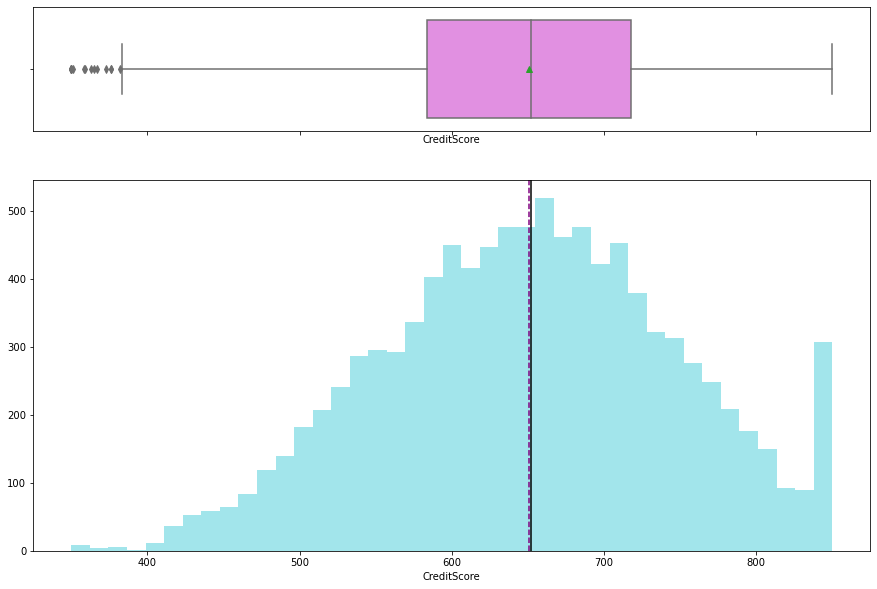

In [14]:
histogram_boxplot(data['CreditScore'])

* Credit Score of the customers are slightly left-skeewed.
* From the boxplot, we can see that there are a few outliers in lower bound.

### Observations on Age

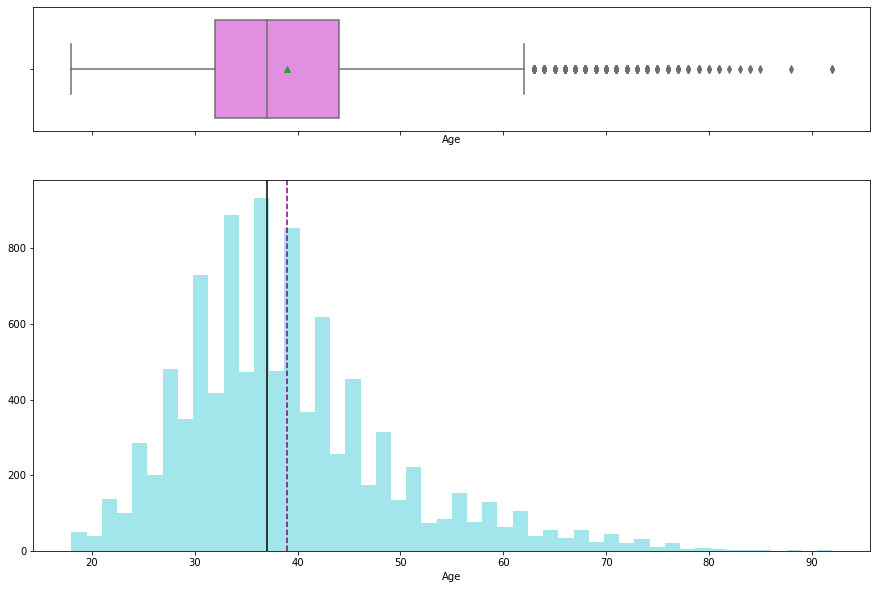

In [15]:
histogram_boxplot(data['Age'])

* Age of the customers are having a few outlier in upper side.

### Observations on Tenure

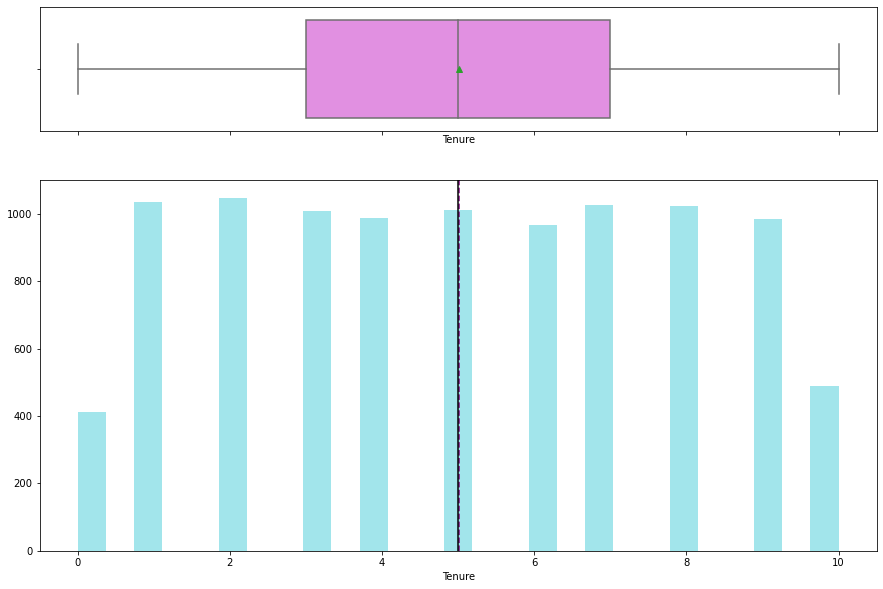

In [16]:
histogram_boxplot(data['Tenure'])

* Tenure of the customers are more of uniform distribution except for 0 and 10 years of the tenure.

### Observations on Balance

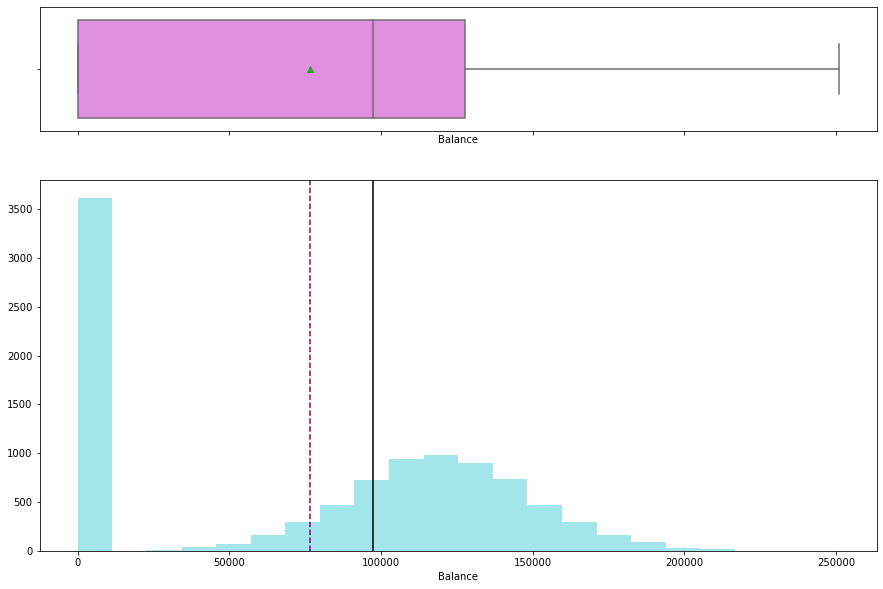

In [17]:
histogram_boxplot(data['Balance'])

* Around 36% of customers are having zero balance.

### Observations on EstimatedSalary

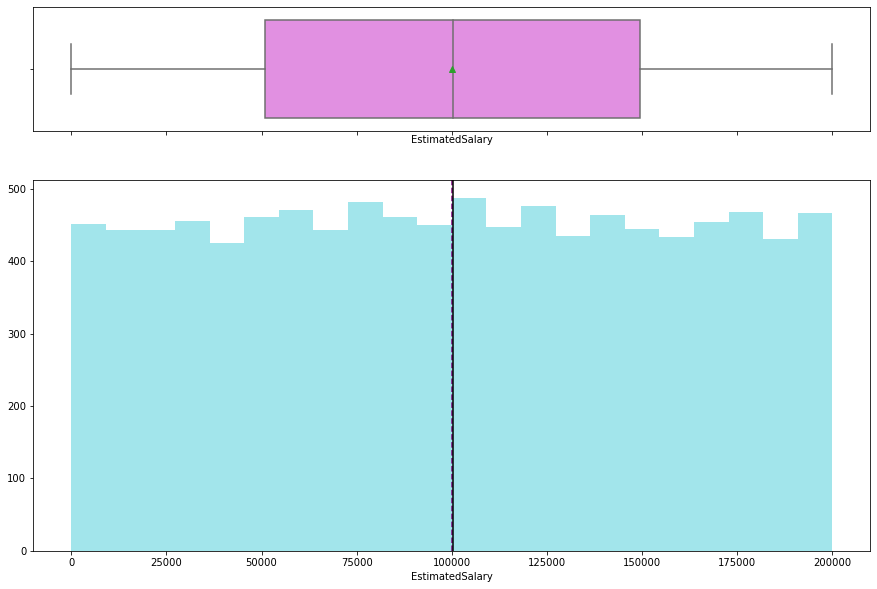

In [18]:
histogram_boxplot(data['EstimatedSalary'])

* Estimated salary of the customers are having unform ditribution in the range of 0 to 200K.

In [19]:
# Function to create the bar plots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''
    

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Geography

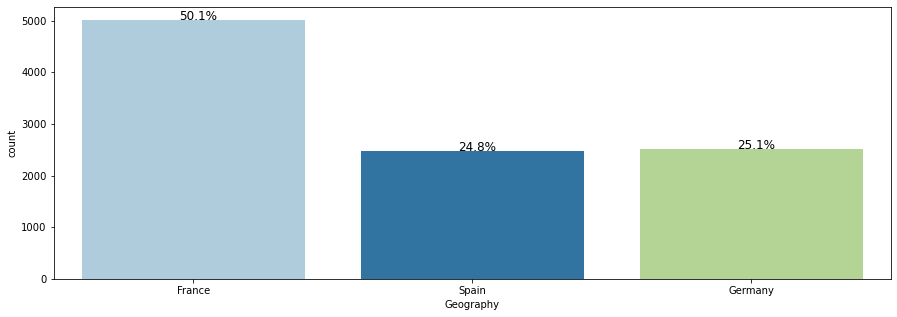

In [20]:
perc_on_bar('Geography')

* Half of the customers are from France and reamining are equally shared between Spain and Germany.

### Observations on Gender

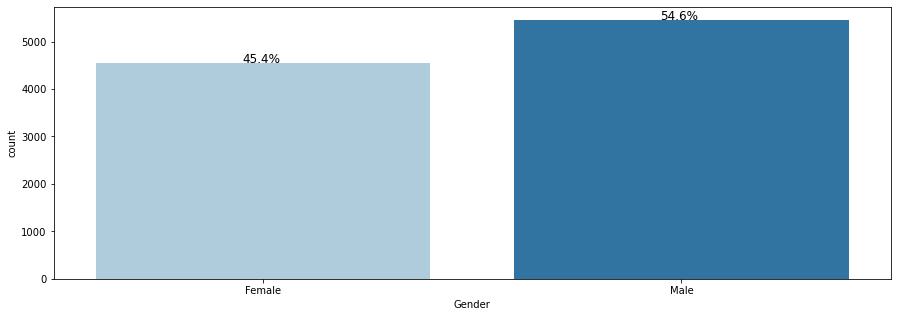

In [21]:
perc_on_bar('Gender')

* Male customers are covering 54.6% of total customer dataset.

### Observations on NumOfProducts

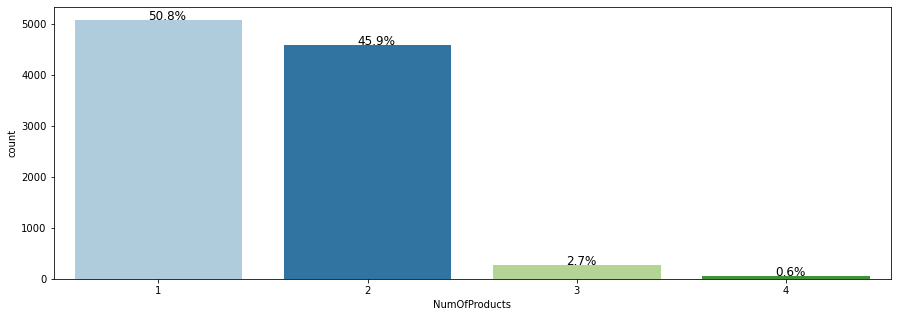

In [22]:
perc_on_bar('NumOfProducts')

- Very few customers are having more than 2 products (3.3% of total customers).

### Observations on HasCrCard

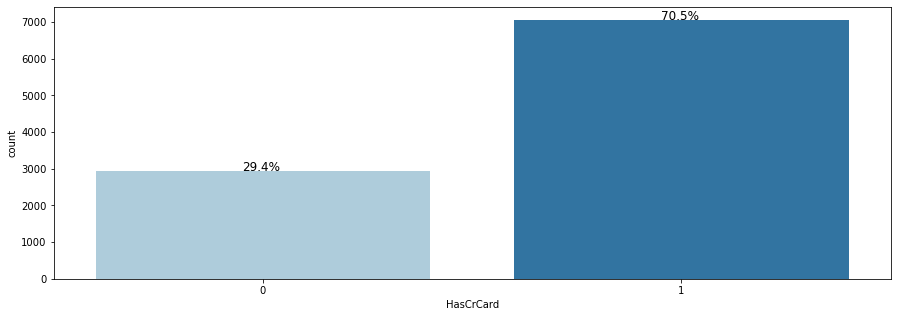

In [23]:
perc_on_bar('HasCrCard')

- 70.5% of customers have credit card.

### Observations on IsActiveMember

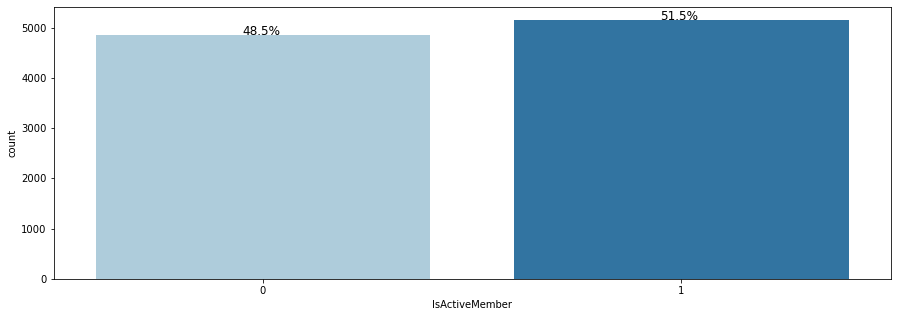

In [24]:
perc_on_bar('IsActiveMember')

- 48.5% of the customers are inactive, that can be a concern for the bank and thus needs to be addressed.

### Observations on Exit

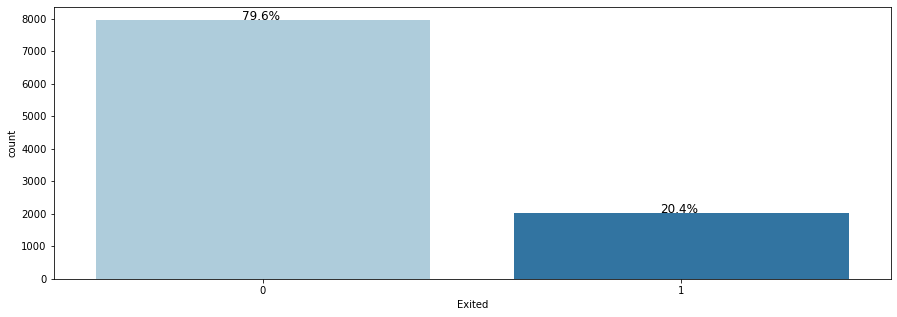

In [25]:
perc_on_bar('Exited')

- Dataset looks imbalance with more of 80-20 class representation  ( 79.6% Non Exited Customers and 20.4% Churned/Exited Customers.)

## Bivariate Analysis

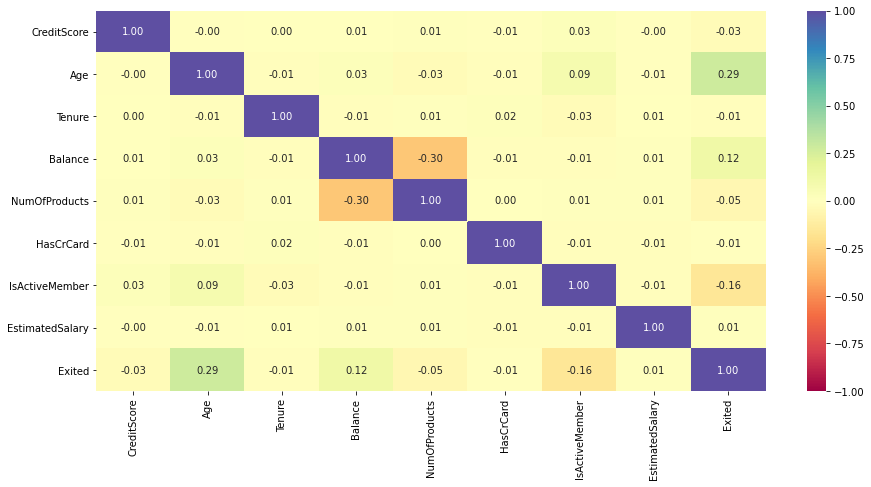

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

- There is not much of correlation seen between the features.
- Age and Churn has loose correlation with corr coefficient of 0.29.
- Number of product and Balance are having a bit of negative correlation, that needs to be investgated further.

<Figure size 1080x504 with 0 Axes>

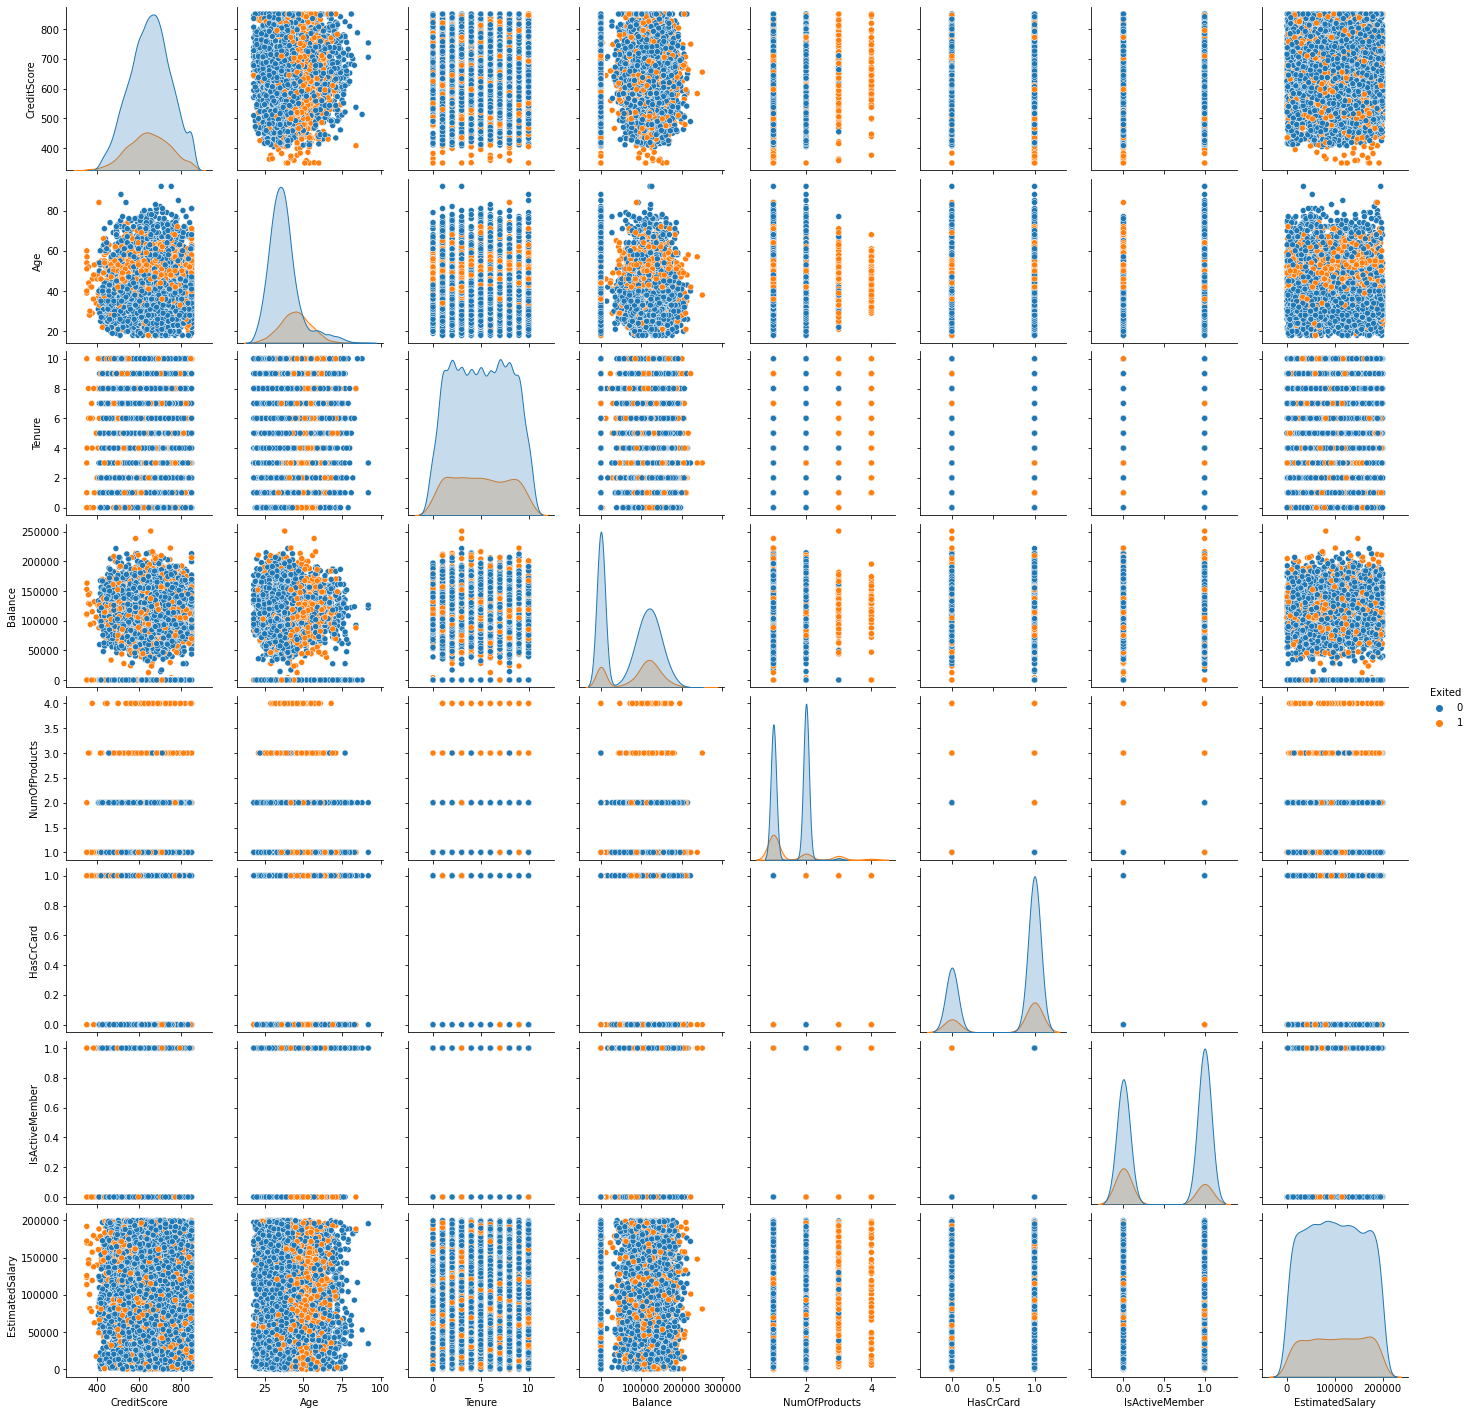

In [27]:
plt.figure(figsize=(15,7))
sns.pairplot(data,diag_kind='kde', hue='Exited')
plt.show()

- There is not much of correlation seen between the features.
- Age and Churn has loose correlation with corr coefficient of 0.29.
- Number of product and Balance are having a bit of negative correlation, that needs to be investgated further.

In [28]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


## Exited Vs CreditScore, Age, Tenure, Balance and EstimatedSalary distributions

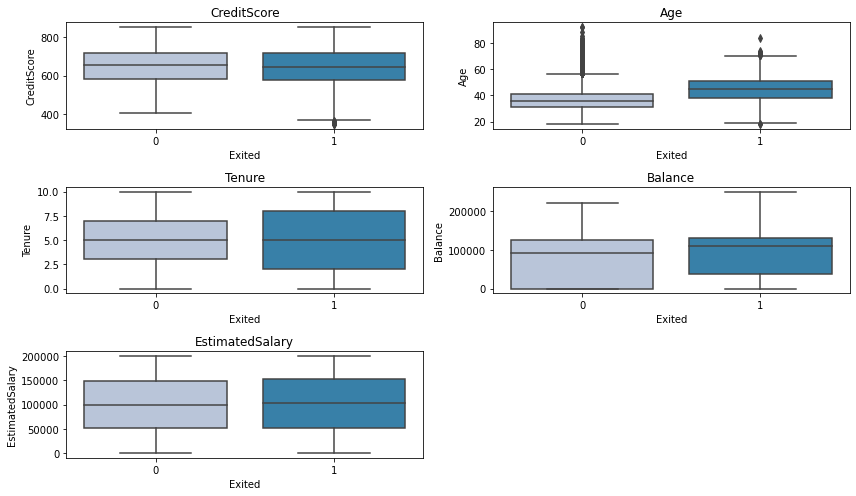

In [29]:
cols =data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data['Exited'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- There are few outliers present in Age for both the class.
- CreditScore and Estimated Salary look similar for the both the exited and non-exited class.
- Age is comparatively higher for churned customers.
- There are more than 25% zero balance customers in existing customers.
- In tenure, for churned customers, there is interesting trend observed that most of the customers are having very less tenure or comparatively higher tenure.

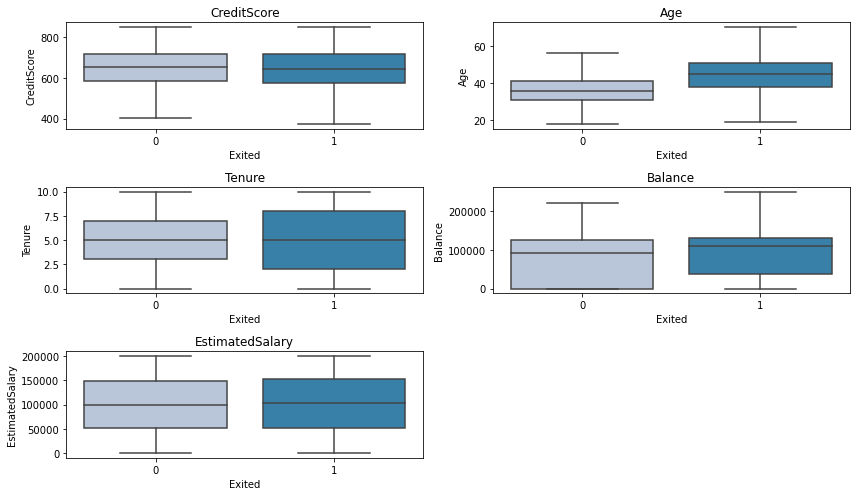

In [30]:
# removing the outliers
cols =data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data['Exited'],data[variable],palette="PuBu", showfliers = False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- CreditScore and Estimated Salary look similar for the both the exited and non-exited class.
- Age is comparatively higher for churned customers.
- There are more than 25% zero balance customers in existing customers.
- In tenure, for churned customers, there is interesting trend observed that most of the customers are having very less tenure or comparatively higher tenure.

#### Stack Plot to present the difference in Churned and Existing customers

In [31]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [32]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


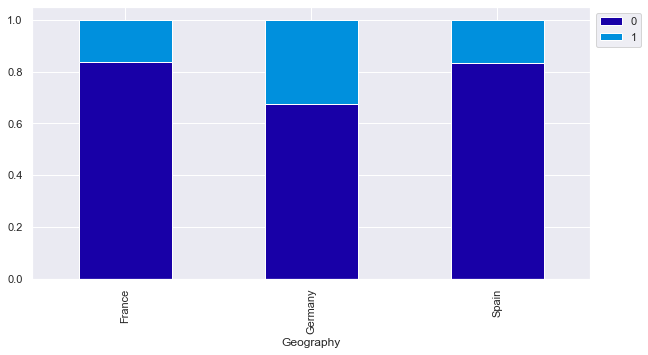

In [33]:
stacked_plot(data['Geography'])

- Germany has comparatvely higher churn ratio despite having lower number of customers.

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


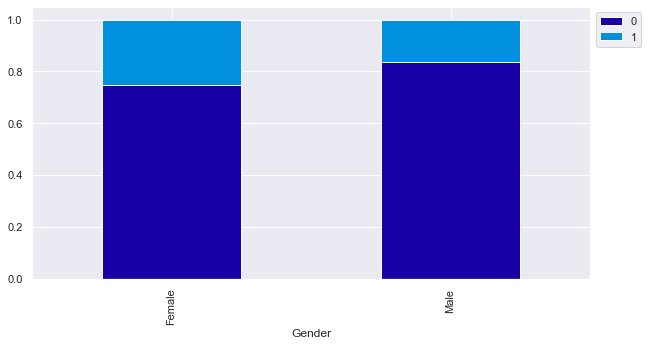

In [34]:
stacked_plot(data['Gender'])

- Higher churn trend observed for Female customers in comparison to Male customers.

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


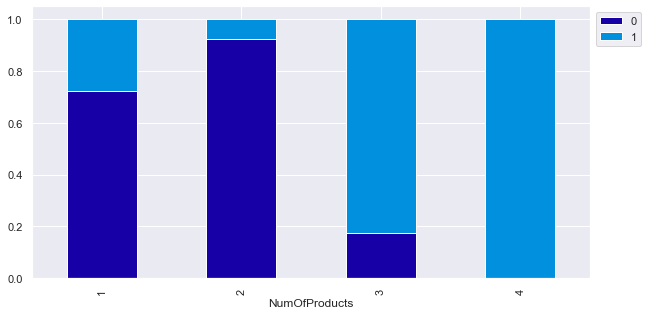

In [35]:
stacked_plot(data['NumOfProducts'])

- Customers having higher number of products (more than 2) are seen to be highest churn ratio, this can be due to experience or service quality.

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


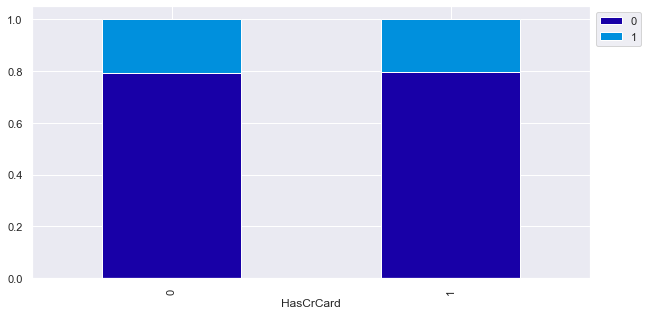

In [36]:
stacked_plot(data['HasCrCard'])

- Credit card possesion seems not be affecting directly to churn.

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


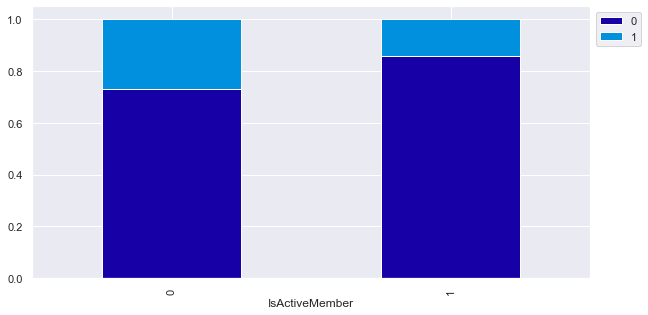

In [37]:
stacked_plot(data['IsActiveMember'])

- Inactivity of the customers are directly linked with customer churn here, thus bank should focus more on customer enegagement to promote retention.

-----

## Customers Profile : `Churned` and `Non Churned`

#### Churned Customers

In [38]:
data[data['Exited'] == 1].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000,2037.000,2037.000,2037.000,2037.000,2037.000,2037.000,2037.000,2037.000
mean,645.351,44.838,4.933,91108.539,1.475,0.699,0.361,101465.678,1.000
std,100.322,9.762,2.936,58360.795,0.802,0.459,0.480,57912.418,0.000
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,1.000
25%,578.000,38.000,2.000,38340.020,1.000,0.000,0.000,51907.720,1.000
50%,646.000,45.000,5.000,109349.290,1.000,1.000,0.000,102460.840,1.000
75%,716.000,51.000,8.000,131433.330,2.000,1.000,1.000,152422.910,1.000
max,850.000,84.000,10.000,250898.090,4.000,1.000,1.000,199808.100,1.000


In [39]:
data[data['Exited'] == 1].describe(include = 'object')

,Geography,Gender
count,2037,2037
unique,3,2
top,Germany,Female
freq,814,1139


**Insights**
- Most of the customers who churned out were inactive and  not using bank products regularly, making transactions, etc. 
- Churned customers are having on an average 91K balance, so it can be big concern for the bank.
- Average age of this group of customers is 45 years.

### Exisiting/Non-Churned Customers

In [40]:
data[data['Exited'] == 0].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000,7963.000,7963.000,7963.000,7963.000,7963.000,7963.000,7963.000,7963.000
mean,651.853,37.408,5.033,72745.297,1.544,0.707,0.555,99738.392,0.000
std,95.654,10.125,2.881,62848.041,0.510,0.455,0.497,57405.587,0.000
min,405.000,18.000,0.000,0.000,1.000,0.000,0.000,90.070,0.000
25%,585.000,31.000,3.000,0.000,1.000,0.000,0.000,50783.490,0.000
50%,653.000,36.000,5.000,92072.680,2.000,1.000,1.000,99645.040,0.000
75%,718.000,41.000,7.000,126410.280,2.000,1.000,1.000,148609.955,0.000
max,850.000,92.000,10.000,221532.800,3.000,1.000,1.000,199992.480,0.000


In [41]:
data[data['Exited'] == 0].describe(include = 'object')

,Geography,Gender
count,7963,7963
unique,3,2
top,France,Male
freq,4204,4559


**Insights**
- Comparatively the existing customers are more active than churned customers, thus customer engagement can be probable candidate for customer retention.
- More than 25% of the existing customers are having zero balance, that can be focus area for the bank to increase cash.

---

## <a id = "link3"></a> Insights based on EDA

* Comparatively the existing customers are more active than churned customers, thus customer engagement can be probable candidate for customer retention.
* We have see higher churn for the customers having high number of products.
* More than 25% of the existing customers are having zero balance, that can be focus area for the bank to increase cash.
* CreditScore for the customers here lie from 350 to 850 with seeminglig having normal distribution.
* There is not much of correlation seen between the features.
* Number of product and Balance are having a bit of negative correlation, that needs to be investgated further.
* All of the customers are from France, Germany and spain, and thus we can encode it for further analysis.
* Age of the customers are widely distributed from 18 years to 92 years, with half of the customers having age less than 37 years.
* More than 25% of the existing customers are having zero balance.
* NumofProducts are ranging from 1 to 4 for the customers, of which half of them are having 1 product.
* Around 51% of the customers are active members.
* Around 20% of the customers have left the bank and services.
* Age and Churn has loose correlation with corr coefficient of 0.29.

----

## <a id = "link4"></a> Data Pre-Processing

In [42]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [43]:
##outlier action

def outliers_action(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def outliers_action_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = outliers_action(df,c)
        
    return df

In [44]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('Exited')

data_bot = data.copy() #before outiler treatment

data = outliers_action_all(data,numerical_col) 

### Missing Value Treatement 

* There is no missing value in the dataset.

### Data ncoding for Categorical Variables

In [45]:
# encoding for the categorical variables
data = pd.get_dummies(data,drop_first=True)

In [46]:
X_data = data.drop(['Exited'], axis=1)
y_data = data['Exited']

### Splitting the dataset

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


### Scaling

In [49]:
#training set to avoid data leakage
columns = X_train.columns.to_list()
X_train[columns] = MinMaxScaler().fit_transform(X_train[columns]) 
#test set
columns = X_test.columns.to_list()
X_test[columns] = MinMaxScaler().fit_transform(X_test[columns]) 

In [50]:
#test set
columns = X_test.columns.to_list()
X_test[columns] = MinMaxScaler().fit_transform(X_test[columns]) 

----

## Confusion Matrix

In [51]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# <a id = "link5"></a> Model Building

### Neural Network

Model-1

- Simple NN made of 5 fully-connected layers with ReLu activation. 
- a dropout step is included to prevent overfitting.



**Dropout**

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

In [121]:
#initialize the model
model1 = Sequential()

In [122]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(units=64, input_dim = 11,activation='relu'))  
# hidden layer
model1.add(Dense(units=128,activation='relu')) 
model1.add(Dense(1,activation='sigmoid'))                        # binary classification fraudulent or not

In [132]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [125]:
#fitting the model
history=model1.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 88us/sample - loss: 0.4891 - acc: 0.7877 - val_loss: 0.4663 - val_acc: 0.7975
Epoch 2/10
6400/6400 [==============================] - 0s 45us/sample - loss: 0.4313 - acc: 0.8123 - val_loss: 0.4442 - val_acc: 0.8138
Epoch 3/10
6400/6400 [==============================] - 0s 53us/sample - loss: 0.4125 - acc: 0.8280 - val_loss: 0.4380 - val_acc: 0.8125
Epoch 4/10
6400/6400 [==============================] - 0s 42us/sample - loss: 0.3949 - acc: 0.8378 - val_loss: 0.4178 - val_acc: 0.8256
Epoch 5/10
6400/6400 [==============================] - 0s 42us/sample - loss: 0.3770 - acc: 0.8453 - val_loss: 0.3961 - val_acc: 0.8350
Epoch 6/10
6400/6400 [==============================] - 0s 41us/sample - loss: 0.3619 - acc: 0.8533 - val_loss: 0.3807 - val_acc: 0.8406
Epoch 7/10
6400/6400 [==============================] - 0s 56us/sample - loss: 0.3554 - acc: 0.8553 - val_loss: 0.3852 - val_acc: 

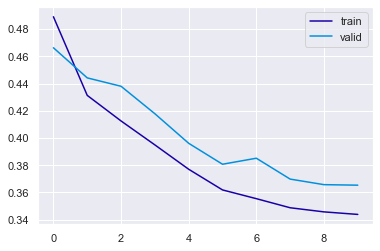

In [126]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [127]:
score = model1.evaluate(X_test, y_test)

In [128]:
print(score)


[0.358473299741745, 0.8585]


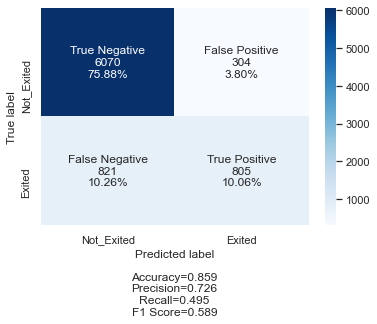

In [129]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model1.predict(X_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

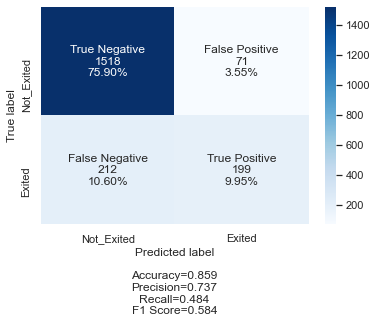

In [130]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

 # <a id = "link6"></a> Model Performance Improvement

#### Metric for model performance evaluation

* Company  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the exited customers.

* We must find ways to further reduce the number of false negative.

### AUC-ROC Curve

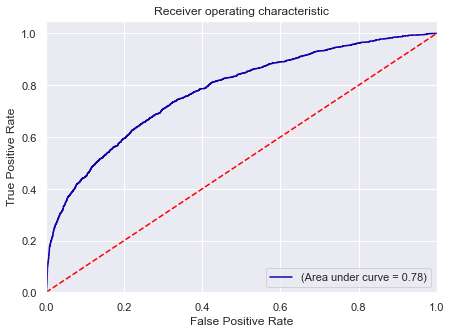

In [62]:
##training set
logit_roc_auc_train = roc_auc_score(y_train, model1.predict(X_train)[:,0])
fpr, tpr, thresholds = roc_curve(y_train, model1.predict(X_train)[:,0])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='(Area under curve = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

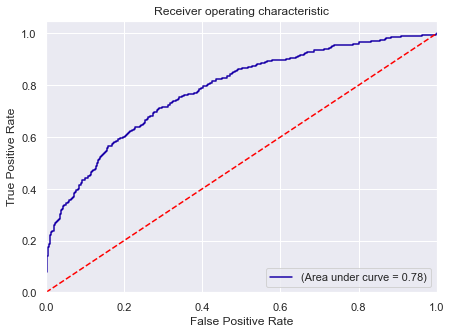

In [63]:
##test set
logit_roc_auc_train = roc_auc_score(y_test, model1.predict(X_test)[:,0])
fpr, tpr, thresholds = roc_curve(y_test, model1.predict(X_test)[:,0])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='(Area under curve = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-2

#### Let's try another architecture to get the better Recall 


There are some basic Hyperparameters like weight analysis and dropout which can help to get the better model performance.

In [64]:
#Training Multi-layer perceptron with 2 hidden layers
n_inputs = 11
kernel = 'random_normal'
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(64, input_shape=(n_inputs, ), kernel_initializer=kernel, activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(128, kernel_initializer=kernel, activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(128, kernel_initializer=kernel, activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(128, kernel_initializer=kernel, activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(128, kernel_initializer=kernel, activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(128, kernel_initializer=kernel, activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer=kernel, activation='sigmoid'))

Model2.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=40, callbacks=[es], shuffle=True, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 6400 samples, validate on 1600 samples
Epoch 1/40
6400/6400 [==============================] - 0s 78us/sample - loss: 0.4914 - acc: 0.8012 - val_loss: 0.4492 - val_acc: 0.8138
Epoch 2/40
6400/6400 [==============================] - 0s 49us/sample - loss: 0.4371 - acc: 0.8234 - val_loss: 0.4439 - val_acc: 0.7900
Epoch 3/40
6400/6400 [==============================] - 0s 51us/sample - loss: 0.3951 - acc: 0.8328 - val_loss: 0.4194 - val_acc: 0.8300
Epoch 4/40
6400/6400 [==============================] - 0s 52us/sample - loss: 0.3734 - acc: 0.8444 - val_loss: 0.4070 - val_acc: 0.8056
Epoch 5/40
6400/6400 [==============================] - 0s 53us/sample - loss: 0.3657 - acc: 0.8494 - val_loss: 0.3744 - val_acc: 0.8500
Epoch 6/40
6400/6400 [==============================] - 0s 44us/sample - loss: 0.3548 - acc: 0.8512 - val_loss: 0.3768 - val_acc: 0.8500
Epoch 7/40
6

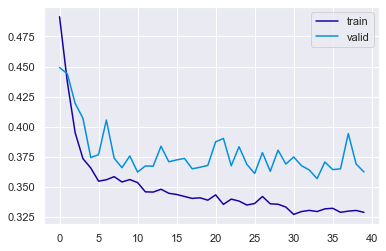

In [65]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


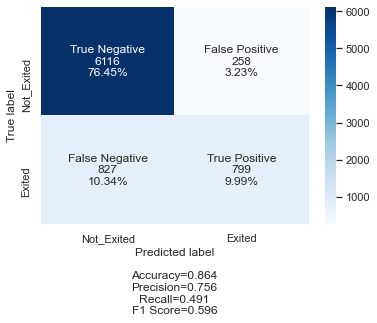

In [66]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred2 = Model2.predict(X_train)
for i in range(len(y_train)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_train, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

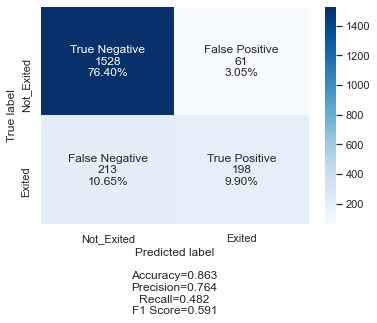

In [67]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred2 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## AUC-ROC Curve

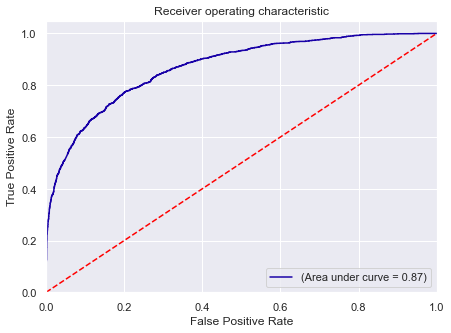

In [68]:
##training set
logit_roc_auc_train = roc_auc_score(y_train, Model2.predict(X_train)[:,0])
fpr, tpr, thresholds = roc_curve(y_train, Model2.predict(X_train)[:,0])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='(Area under curve = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

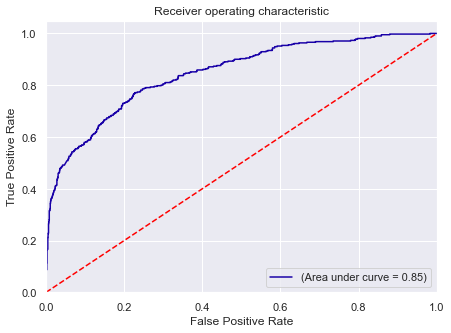

In [69]:
##test set
logit_roc_auc_train = roc_auc_score(y_test, Model2.predict(X_test)[:,0])
fpr, tpr, thresholds = roc_curve(y_test, Model2.predict(X_test)[:,0])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='(Area under curve = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Conclusion:**

As you can see here the Recall of the model is not improved and it is worse than the Previous ANN model as well as the RandomForest but the precision is changed.

Let's try weighted loss for imbalance dataset

-----

### Weighted loss to account for large class imbalance in train dataset
- we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection.

We will use our first ANN model and apply weighted loss


 Let's review the process:

In [70]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

- The class 'Exited' (y=1) is assigned a weight of 2.46 vs 0.62 for the class 'not exited' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent cases during training.

### Training the model - 

In [71]:
Model2.fit(X_train,y_train,batch_size=32,epochs=50, class_weight=class_weights, shuffle=True)

Train on 8000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 99us/sample - loss: 0.4883 - acc: 0.7851
Epoch 2/50
8000/8000 [==============================] - 1s 82us/sample - loss: 0.4818 - acc: 0.7797
Epoch 3/50
8000/8000 [==============================] - 1s 86us/sample - loss: 0.4761 - acc: 0.7782
Epoch 4/50
8000/8000 [==============================] - 1s 92us/sample - loss: 0.4669 - acc: 0.7816
Epoch 5/50
8000/8000 [==============================] - 1s 87us/sample - loss: 0.5052 - acc: 0.7660
Epoch 6/50
8000/8000 [==============================] - 1s 106us/sample - loss: 0.4919 - acc: 0.7548
Epoch 7/50
8000/8000 [==============================] - 1s 91us/sample - loss: 0.4905 - acc: 0.7566
Epoch 8/50
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4784 - acc: 0.7786
Epoch 9/50
8000/8000 [==============================] - 1s 94us/sample - loss: 0.4683 - acc: 0.7800
Epoch 10/50
8000/8000 [==============================] - 1s 90us/sample - los

-----

In [72]:
score_weighted = Model2.evaluate(X_test, y_test)

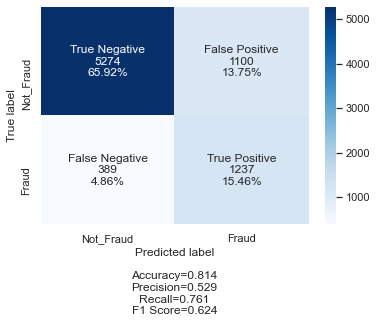

In [73]:
## Confusion Matrix on training set
import seaborn as sn
y_pred3 = Model2.predict(X_train)
for i in range(len(y_train)):
    if y_pred3[i]>0.5:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0



cm2=confusion_matrix(y_train, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

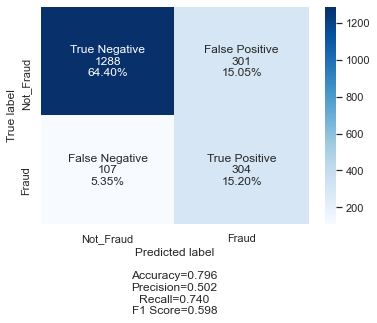

In [74]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred3 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred3[i]>0.5:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0



cm2=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### AUC-ROC Curve

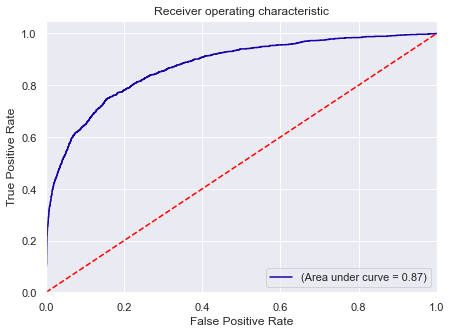

In [75]:
##training set
logit_roc_auc_train = roc_auc_score(y_train, Model2.predict(X_train)[:,0])
fpr, tpr, thresholds = roc_curve(y_train, Model2.predict(X_train)[:,0])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='(Area under curve = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

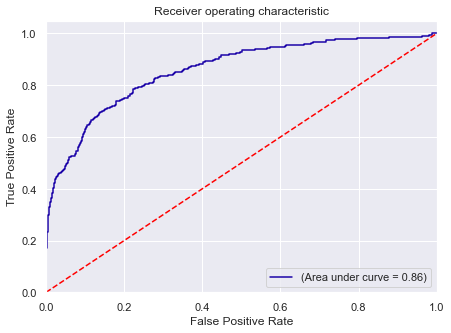

In [76]:
##test set
logit_roc_auc_train = roc_auc_score(y_test, Model2.predict(X_test)[:,0])
fpr, tpr, thresholds = roc_curve(y_test, Model2.predict(X_test)[:,0])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='(Area under curve = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## <a id = "link7"></a>  Model Performance Evaluation

In [88]:
comparison_frame = pd.DataFrame({'Model1':['Initial NN Model','Improved NN Model',
                                          'Improved NN Model with class weight'], 'Train_Recall':[0.33,0.49,0.76], 'Test_Recall':[0.33,0.48,0.74]}) 
comparison_frame

,Model1,Train_Recall,Test_Recall
0,Initial NN Model,0.330,0.330
1,Improved NN Model,0.490,0.480
2,Improved NN Model with class weight,0.760,0.740


### Performance and Scope of improvement
- Since the dataset is imbalance, thus class weight can improve the performance on required metrics of recall.
- The best model here in terms of performance is the one with class weight and achieves the test_recall of 0.68
- We have'nt achieved the best performance, and still can be improved the result with better NN architecture :
1. Threshold can be tuned to get the optimal value 
2. Resampling techniques can be applied to balanced the data and then train the model 
3. Hyperparameter tuning can be applied to tune the different Hyperparameters

## Explaining Neural network model using SHAP

In [78]:
# init the JS visualization code
shap.initjs()

In [82]:
features = X_test.columns.tolist()
explainer = shap.KernelExplainer(Model2.predict,X_train[:200])
shap_values = explainer.shap_values(X_test,nsamples=200)

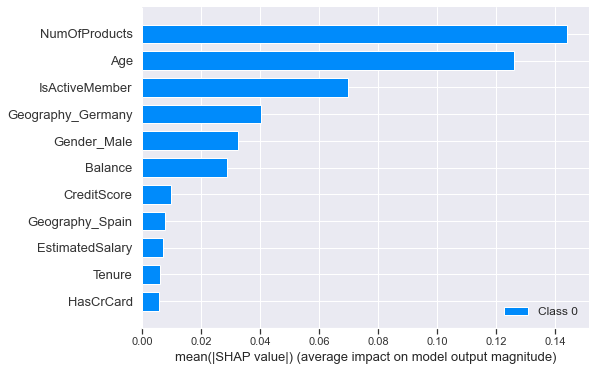

In [81]:
shap.summary_plot(shap_values,X_test,feature_names=features)

## <a id = "link8"></a> Conclusion and key takeaways 

- Number of Products, Age, Inactivity and Geography seems to be prominent factor in customer churn.
- Resampling techniques can be applied to balanced the data and then train the model for better performance since dataset is imbalance.
- Germany has the higher churn ratio, thus needs to be addressed by bank specifically.
- We have see higher churn for the customers having high number of products.

## <a id = "link9"></a> Actionable Insights & Recommendations

* We have been able to build prediction model:
  a) that represents the specificity of behaviorial attributes of customers that are prominent to churn
  b) that company can focus on to build more customer-specific changes to improve retention and revenue
  c) based on which company can take appropriate marketing strategy to grow the customer base and revenue. 

* Attributes that defines the different customer classes (Existing and Churned) more prominently -   **Number of Products**,**Age**, **Inactivity** and **Geography**.

* **Number of Porducts** : We have seen higher churn for the customers having high number of products. This may be due to the service and inefficeint management of the products together. Bank should focus on user experience and giving seamless service across the products to reatin customers.

* **Age** :  Age is also seen to be a factor in churn distribution, that infers to have customer centric product based on their needs to retain them.

* **Inactivity**: We have seen with our analysis and model prediction that inactivity is leading to customer churn thus customer engagement must be focused on priority to improve customer retention.

* **Geography**: We have seen a lot of churn ration in Germany, thus bank should do a thororugh analysis based on demography and region with competitor study in that market to improve the service and gain more market share and retain customers.


**Thus cutomer engagemnet, demography and region based marketing, and customer centric approach leveraging the designed model can help reach the company both the objective of retaining customer base and gaining higher market share .**